In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv("./data_clean.csv")



In [4]:
df.head()

,Unnamed: 0,ID,Start_Time,Severity,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Fair,Fair / Windy,Fog,Fog / Windy,...,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Showers,Sand,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Scattered Clouds,Shallow Fog,Showers in the Vicinity,Sleet,Sleet / Windy,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow and Sleet,Snow and Sleet / Windy,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,0,A-2716600,2016-02-08 00:37:08,3,40.10891,-83.09286,43017.0,42.1,58.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,A-2716601,2016-02-08 05:56:20,2,39.86542,-84.06280,45424.0,36.9,91.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,A-2716602,2016-02-08 06:15:39,2,39.10266,-84.52468,45203.0,36.0,97.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,A-2716603,2016-02-08 06:15:39,2,39.10148,-84.52341,45202.0,36.0,97.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,A-2716604,2016-02-08 06:51:45,2,41.06213,-81.53784,44311.0,39.0,55.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year'] = df['Start_Time'].dt.year
df['Weekday']= df['Start_Time'].dt.weekday
df ['Month'] = df['Start_Time'].dt.month
df ['Hour'] = df['Start_Time'].dt.hour
df.loc[:4,['Start_Time','Year','Month', 'Weekday', 'Hour']]

,Start_Time,Year,Month,Weekday,Hour
0,2016-02-08 00:37:08,2016,2,0,0
1,2016-02-08 05:56:20,2016,2,0,5
2,2016-02-08 06:15:39,2016,2,0,6
3,2016-02-08 06:15:39,2016,2,0,6
4,2016-02-08 06:51:45,2016,2,0,6


In [6]:
feature_lst=[ 'Severity','Start_Lat','Start_Lng','Weekday','Month','Hour', 'Zipcode', 'Temperature(F)', 'Humidity(%)','Visibility(mi)','Junction','Rain','Fog']

df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Severity        1516064 non-null  int64  
 1   Start_Lat       1516064 non-null  float64
 2   Start_Lng       1516064 non-null  float64
 3   Weekday         1516064 non-null  int64  
 4   Month           1516064 non-null  int64  
 5   Hour            1516064 non-null  int64  
 6   Zipcode         1515129 non-null  float64
 7   Temperature(F)  1473031 non-null  float64
 8   Humidity(%)     1470555 non-null  float64
 9   Visibility(mi)  1471853 non-null  float64
 10  Junction        1516064 non-null  int64  
 11  Rain            1516064 non-null  int64  
 12  Fog             1516064 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 150.4 MB


In [11]:
# method 1: remove rows with null value (if want to test with null, comment this cell)
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(1462369, 13)

In [12]:
# Assign the data
df=df_sel

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [14]:

# Random Forest algorithm

#Create a RF Classifier
clf=RandomForestClassifier(n_estimators=100)

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.870.


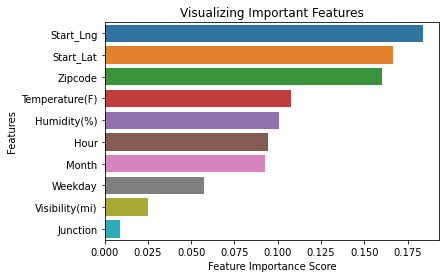

In [15]:
import seaborn as sns

#define Feature importance
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# plt.legend()
plt.show()

In [16]:
k=10
feature_imp.sort_values(ascending=False)[:k]

Start_Lng         0.184072
Start_Lat         0.166224
Zipcode           0.160167
Temperature(F)    0.107899
Humidity(%)       0.100678
Hour              0.094071
Month             0.092655
Weekday           0.057147
Visibility(mi)    0.025219
Junction          0.009116
dtype: float64

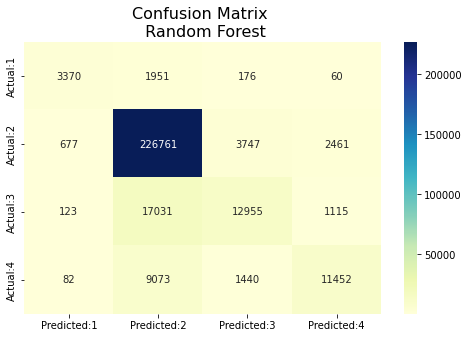

In [17]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4'],index=['Actual:1','Actual:2','Actual:3','Actual:4'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()